# STROKE PREDICTION USING MACHINE LEARNING ALGORITHMS AND ARTIFICIAL INTELLIGENCE

### 1.DATA IMPORTATION AND STRUCTURE

In [1]:
# Importing necessary libraries

import pandas as pd  # Importing pandas for data manipulation and analysis
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
%matplotlib inline  # Ensuring that matplotlib plots are displayed inline in Jupyter notebooks
import seaborn as sns  # Importing seaborn for enhanced data visualization
sns.set_style("darkgrid")  # Setting the style for seaborn plots to 'darkgrid'
import warnings  # Importing warnings to handle warning messages
warnings.filterwarnings("ignore")  # Suppressing all warnings


UsageError: unrecognized arguments: # Ensuring that matplotlib plots are displayed inline in Jupyter notebooks


In [2]:
# Importing our dataset
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")  # Reading the CSV file containing the stroke data into a pandas DataFrame
dataset.head()  # Displaying the first few rows of the dataset to get an overview


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Checking the shape of the dataset
dataset.shape  # This returns a tuple representing the dimensions of the dataset (number of rows, number of columns)


(5110, 12)

We have the records of 5110 patients in our data.
The data has 10 predictors/independent variables that will be used to predict the dependent variable; stroke.
NB: the 'id' field will be removed hence 10 varialbles

In [4]:
# Getting information about the datatypes and non-null values of the various fields in the dataset
dataset.info()  # This method displays the datatype, non-null values, and memory usage of each column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We have missing values in the bmi column. We will understand how to deal with the missing values after we are done analyzing the data.


### 2. EXPLORATORY DATA ANALYSIS

In [5]:
# Getting the statistical summary of the numerical features
dataset.describe()  # This method provides a summary of the statistics for the numerical columns, including count, mean, std deviation, min, max, and quartiles

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Making a copy of the dataset
dataset_copy = dataset.copy(deep=True)  # Creating a deep copy of the original dataset to ensure that changes to the copy do not affect the original dataset

# Creating a function to convert the stroke feature from integer to categorical for EDA
def to_cat(val):
    if val == 1:
        return 'Stroke'  # If the value is 1, return 'Stroke'
    else:
        return 'No Stroke'  # If the value is not 1, return 'No Stroke'

# Applying the function to the data
dataset_copy['class'] = dataset_copy['stroke'].apply(to_cat)  # Applying the to_cat function to the 'stroke' column and creating a new column 'class' with the categorical values
dataset_copy.head()  # Displaying the first few rows of the modified dataset to verify the changes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Stroke


In [7]:
# Dropping the stroke column
dataset_copy.drop('stroke', axis=1, inplace=True)  # Removing the 'stroke' column from the dataset since it's now represented by the 'class' column
print(dataset_copy['class'].unique())  # Printing the unique values in the 'class' column to verify the conversion

['Stroke' 'No Stroke']


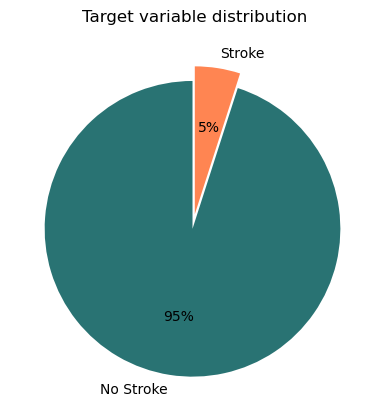

In [8]:
# Class distribution
distribution = dataset_copy.groupby('class').sum()['id'].plot.pie(
    autopct='%1.0f%%',  # Adding percentage labels to the pie chart
    explode=(0.1, 0),  # "Exploding" or offsetting the first slice (Stroke) for emphasis
    colors=['#297373', '#FF8552'],  # Setting custom colors for the slices
    startangle=90  # Starting the pie chart at 90 degrees for better readability
)
distribution.set_ylabel('')  # Removing the y-label for a cleaner look
plt.title("Target variable distribution")  # Setting the title of the plot
plt.show()  # Displaying the plot


The dependent variable is highly imbalance

## 2.1 Univariate Analysis for the Continous Variables

In [9]:
# Function to plot univariate features as we'll be plotting for more than one feature
def univariate_plot(df, kind, col):
    """
    This function generates univariate plots for a given dataframe, plot type, and column.
    
    Parameters:
    df (DataFrame): The dataframe containing the data.
    kind (str): The type of plot to generate ('boxplot', 'histplot', 'kdeplot').
    col (str): The column name to plot.
    
    Returns:
    plot: The generated plot.
    """
    if kind == 'boxplot':
        return sns.boxplot(x=df[col])  # Generate a boxplot for the specified column
    elif kind == 'histplot':
        return sns.histplot(data=df, x=col, kde=False)  # Generate a histogram for the specified column
    else:
        return sns.kdeplot(data=df, x=col, fill=True)  # Generate a KDE plot for the specified column
    
    plt.figure(figsize=(12, 6))  # Set the figure size for the plot
    plt.show()  # Display the plot

In [10]:
def group_data(row):
    """
    Function for age group classifications, BMI classifications, and glucose level classifications 
    according to WHO guidelines.
    """
    # Age groups
    if row['age'] < 6:
        age_group = 'Children'  # Classify as 'Children' if age is less than 6
    elif row['age'] < 18:
        age_group = 'Youth'  # Classify as 'Youth' if age is between 6 and 17
    elif row['age'] <= 65:
        age_group = 'Adults'  # Classify as 'Adults' if age is between 18 and 65
    else:
        age_group = 'Older_Adult'  # Classify as 'Older_Adult' if age is above 65

    # BMI groups
    if row['bmi'] < 18.5:
        bmi_group = 'Underweight'  # Classify as 'Underweight' if BMI is less than 18.5
    elif row['bmi'] < 24.9:
        bmi_group = 'Normal Weight'  # Classify as 'Normal Weight' if BMI is between 18.5 and 24.9
    elif row['bmi'] < 29.9:
        bmi_group = 'Pre-Obesity'  # Classify as 'Pre-Obesity' if BMI is between 25 and 29.9
    elif row['bmi'] < 40:
        bmi_group = 'Obesity'  # Classify as 'Obesity' if BMI is between 30 and 39.9
    else:
        bmi_group = 'Severe Obesity'  # Classify as 'Severe Obesity' if BMI is 40 or above

    # Glucose groups
    if row['avg_glucose_level'] <= 125:
        glucose_group = 'Normal'  # Classify as 'Normal' if average glucose level is 125 or less
    else:
        glucose_group = 'Diabetes'  # Classify as 'Diabetes' if average glucose level is above 125

    # Return all groups
    return pd.Series({'age_group': age_group,
                      'BMI_class': bmi_group,
                      'glucose_class': glucose_group})

# Applying the function to the data
dataset_copy[['age_group', 'BMI_class', 'glucose_class']] = dataset_copy.apply(group_data, axis=1)

# View the updated data
dataset_copy.head()  # Display the first few rows of the updated dataset to verify the changes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,class,age_group,BMI_class,glucose_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Stroke,Older_Adult,Obesity,Diabetes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Stroke,Adults,Severe Obesity,Diabetes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Stroke,Older_Adult,Obesity,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Stroke,Adults,Obesity,Diabetes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Stroke,Older_Adult,Normal Weight,Diabetes


### 2.1.1 Age

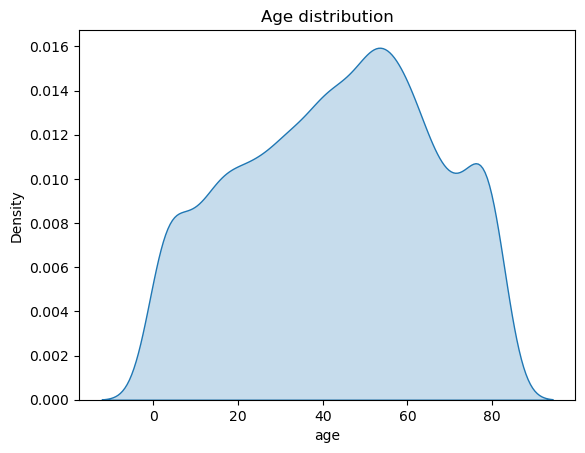

In [11]:
# Density plot for Age
import seaborn as sns
univariate_plot(dataset_copy, 'kdeplot', 'age')  # Generating a KDE plot for the 'age' column
plt.title("Age distribution")  # Setting the title of the plot
plt.show()  # Displaying the plot

Average age: 43.23 years


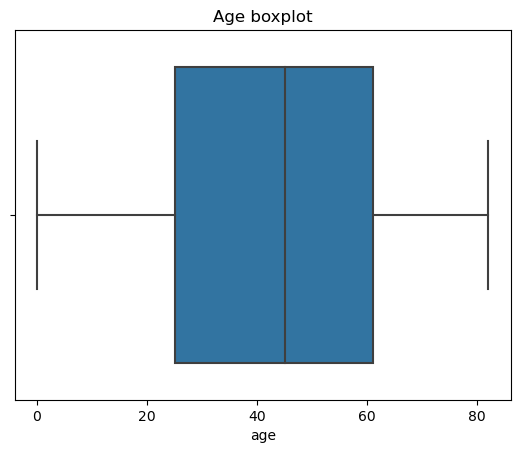

In [12]:
# Boxplot for Age
print("Average age:", round(dataset_copy["age"].mean(), 2), "years")  # Printing the average age rounded to two decimal places
univariate_plot(dataset_copy, 'boxplot', 'age')  # Generating a boxplot for the 'age' column
plt.title("Age boxplot")  # Setting the title of the plot
plt.show()  # Displaying the plot

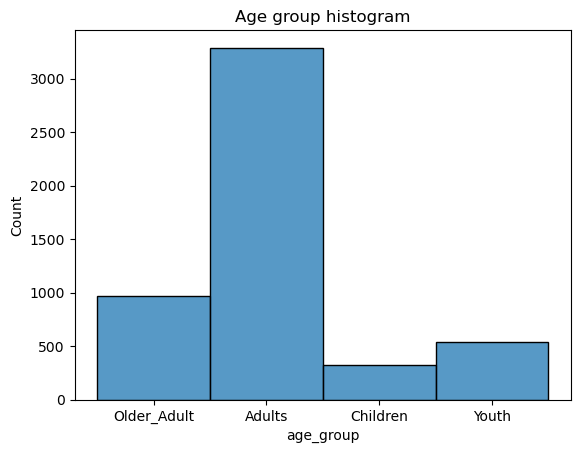

In [13]:
# Histogram for Age group
univariate_plot(dataset_copy, 'histplot', 'age_group')  # Generating a histogram for the 'age_group' column
plt.title("Age group histogram")  # Setting the title of the plot
plt.show()  # Displaying the plot

Observations:

Most patients in the dataset are adults
There are no outliers i.e there's no age out of the ordinary.

### 2.1.2 Glucose Level

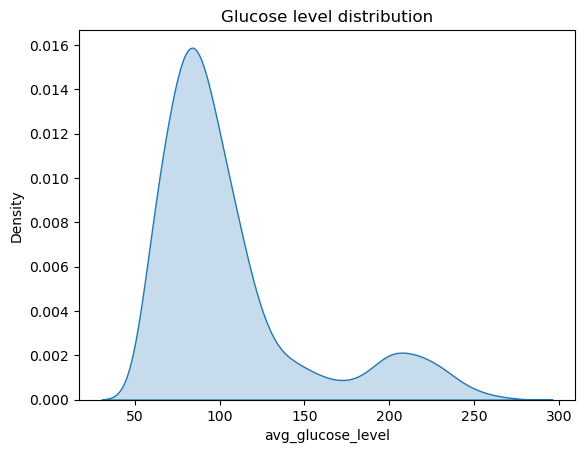

In [14]:
# Density plot for Glucose level
univariate_plot(dataset_copy, 'kdeplot', 'avg_glucose_level')  # Generating a KDE plot for the 'avg_glucose_level' column
plt.title("Glucose level distribution")  # Setting the title of the plot
plt.show()  # Displaying the plot

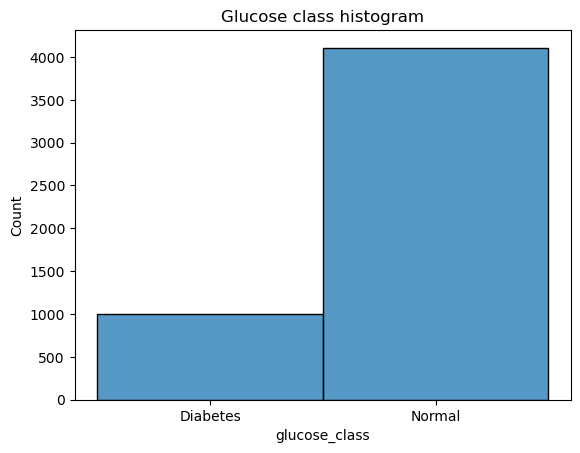

In [15]:
# Histogram for Glucose class
univariate_plot(dataset_copy, 'histplot', 'glucose_class')  # Generating a histogram for the 'glucose_class' column
plt.title("Glucose class histogram")  # Setting the title of the plot
plt.show()  # Displaying the plot

AVG Glucose Level Median: 91.88499999999999


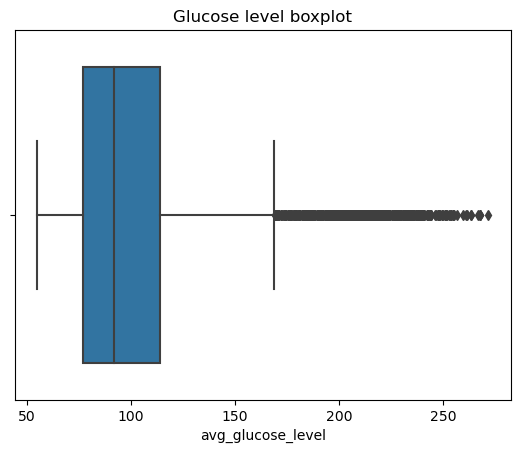

In [16]:
print("AVG Glucose Level Median:", dataset_copy['avg_glucose_level'].median())  # Printing the median average glucose level
univariate_plot(dataset_copy, 'boxplot', 'avg_glucose_level')  # Generating a boxplot for the 'avg_glucose_level' column
plt.title("Glucose level boxplot")  # Setting the title of the plot
plt.show()  # Displaying the plot

Observations:

The average glucose level in the data is right skewed.
Most patients in the dataset has a normal average glucose level.
The outliers in the boxplot are not really outliers, the values are real values, and they depict patients with diabetes.

### 2.1.3 BMI

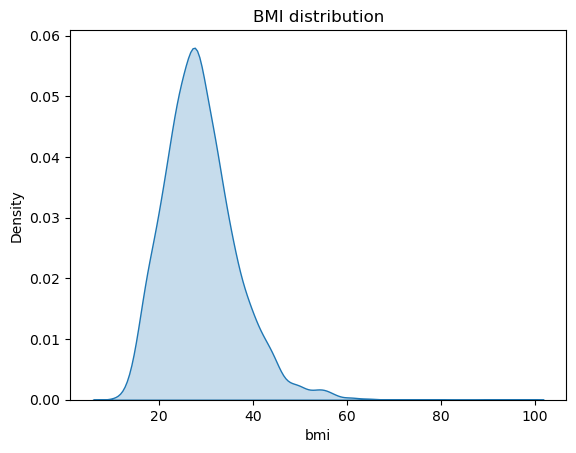

In [17]:
# Density plot for BMI
univariate_plot(dataset_copy, 'kdeplot', 'bmi')  # Generating a KDE plot for the 'bmi' column
plt.title("BMI distribution")  # Setting the title of the plot
plt.show()  # Displaying the plot

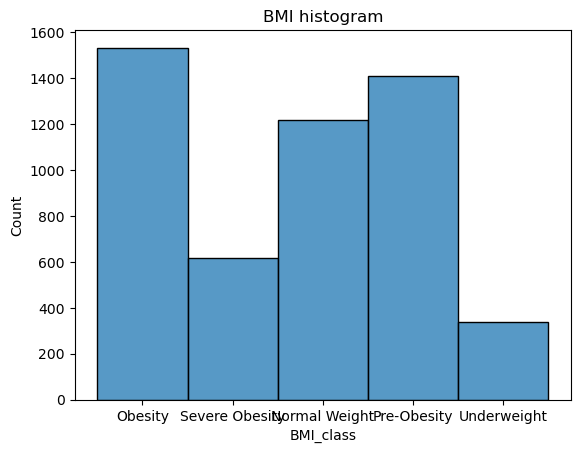

In [18]:
# Histogram for BMI class
univariate_plot(dataset_copy, 'histplot', 'BMI_class')  # Generating a histogram for the 'BMI_class' column
plt.title("BMI histogram")  # Setting the title of the plot
plt.show()  # Displaying the plot

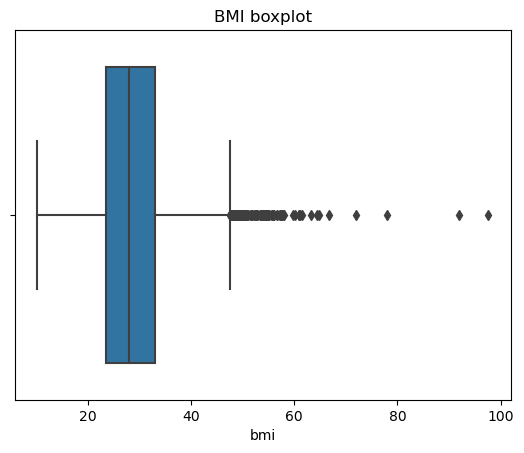

In [19]:
# Boxplot for BMI
univariate_plot(dataset_copy, 'boxplot', 'bmi')  # Generating a boxplot for the 'bmi' column
plt.title("BMI boxplot")  # Setting the title of the plot
plt.show()  # Displaying the plot

Observations:

Most patients aren't healthy in terms of BMI. There are more obesed and pre-obese and severe-obesed patients than the ones with normal weight.
There are outliers in the BMI column as well.

### 2.2 Univariate Analysis for the Categorical Variables

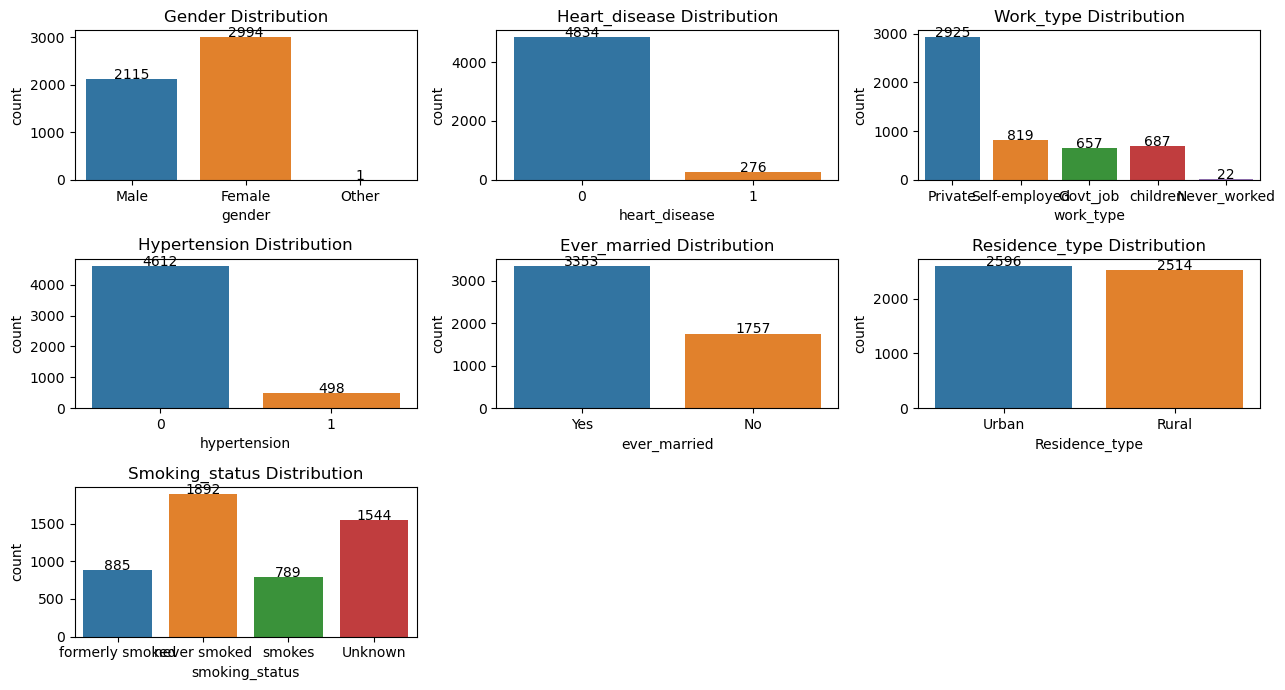

In [20]:
# Creating the figure and subplots
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(13, 7))

# Removing the last two subplots in the third row to align with the count of attributes
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Attributes to display and their corresponding subplot indices
attributes = ["gender", "heart_disease", "work_type", "hypertension", "ever_married", "Residence_type", "smoking_status"]
subplot_indices = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0)]

# Looping to create count plots for each attribute
for idx, attr in enumerate(attributes):
    row_idx, col_idx = subplot_indices[idx]
    sns.countplot(x=dataset_copy[attr], ax=axes[row_idx, col_idx])
    # Adding annotations to show the exact count above each bar in the count plot
    for patch in axes[row_idx, col_idx].patches:
        axes[row_idx, col_idx].text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, '{:.0f}'.format(patch.get_height()), ha='center')
    axes[row_idx, col_idx].set_title(f"{attr.capitalize()} Distribution")  # Setting title for each subplot

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the figure
plt.show()

Observations:

* Most patients in the datasets are females. There is a single patient whose gender is "Other".

* Since female is the mode of the gender feature, the patient with 'Other' will be re-categorised to female in order to have just 2 categories in the column.

* Most of the patients in the data are healthy in terms of heart disease.

* More than 50% of the patients work in the private sector.

* With the assumption that children can't work/never worked, we can move the instances of "children" category to the "Never_worked" category.

* About 90% of the patients are not hypertensive.

* We have more patients who have married at one stage in their life than those who haven't.

* We have almost equal amount of patients living in the Rural and Urban areas.

In [21]:
# Checking to see details of the patient categorised as "Other"
dataset_copy[dataset_copy["gender"] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,class,age_group,BMI_class,glucose_class
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,No Stroke,Adults,Normal Weight,Diabetes


In [22]:
# Checking the count of patients who are less than 18 years old and have "Unknown" smoking status
count_unknown_smoking_under_18 = dataset_copy[(dataset_copy.smoking_status == 'Unknown') & (dataset_copy.age < 18)].shape[0]
count_unknown_smoking_under_18

682

##### Observation

* we have more patients that have never smoked in the dataset.
* We also have lots of "unknown" smoking status.
* Since we have 682 patients less than 18, we can make an assumption that they never smoked and hence move them to the "never smoked" section instead.

### 2.3 Multivariate Analysis

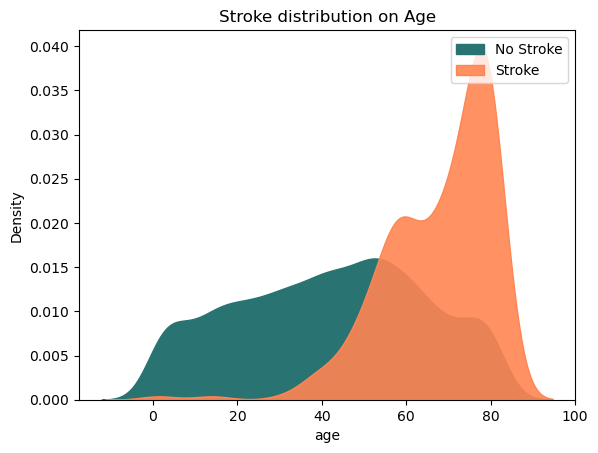

In [23]:
# Target variable distribution on Age
fig, ax = plt.subplots()

# KDE plot for 'No Stroke' class
sns.kdeplot(data=dataset_copy[dataset_copy['class'] == 'No Stroke'], 
            x='age', ax=ax, fill=True, alpha=1, color='#297373')

# KDE plot for 'Stroke' class
sns.kdeplot(data=dataset_copy[dataset_copy['class'] == 'Stroke'], 
            x='age', ax=ax, fill=True, alpha=0.9, color='#FF8552')

ax.legend(['No Stroke', 'Stroke'])  # Adding a legend for the plot
plt.title("Stroke distribution on Age")  # Setting the title of the plot
plt.show()  # Displaying the plot

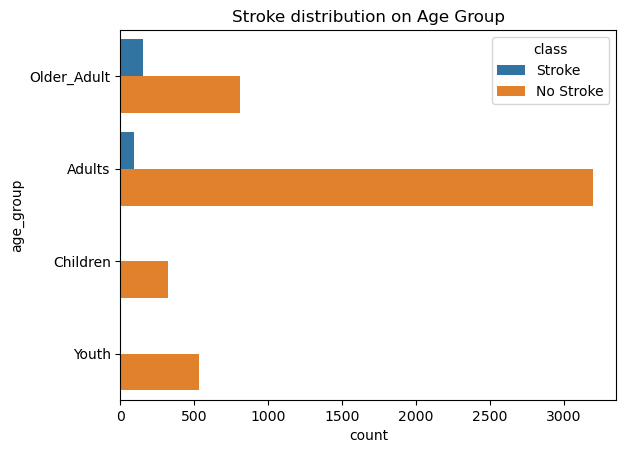

In [24]:
# Target variable distribution on Age group
sns.countplot(data=dataset_copy, y='age_group', hue='class')  # Creating a count plot for 'age_group' with hue based on 'class'
plt.title("Stroke distribution on Age Group")  # Setting the title of the plot
plt.show()  # Displaying the plot

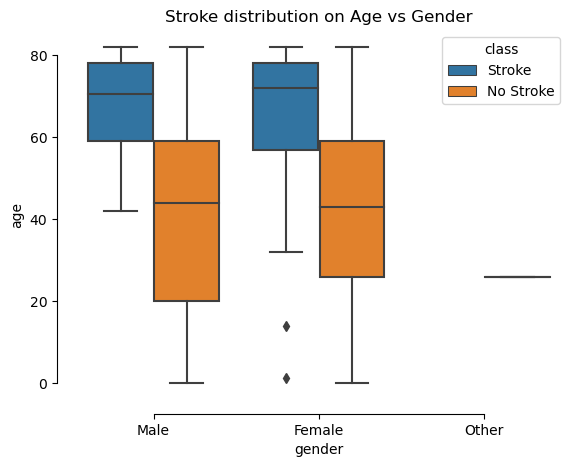

In [25]:
# Gender stroke distribution
sns.boxplot(x="gender", y="age", hue="class", data=dataset_copy)  # Creating a boxplot for age vs gender with hue based on 'class'
sns.despine(offset=10, trim=True)  # Removing spines from the plot
plt.title("Stroke distribution on Age vs Gender")  # Setting the title of the plot
plt.show()  # Displaying the plot

Observations:

 * The males in the data tend to have stroke at age over 40, while women tends to have stroke from age around 30s.
* There are two children, both females (less than 18 years) that have stroke.

In [26]:
# Checking details of outliers in the plot
dataset_copy[(dataset_copy.gender == 'Female') & (dataset_copy.age < 20) & (dataset_copy['class'] == 'Stroke')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,class,age_group,BMI_class,glucose_class
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,Stroke,Children,Severe Obesity,Normal
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,Stroke,Youth,Obesity,Normal


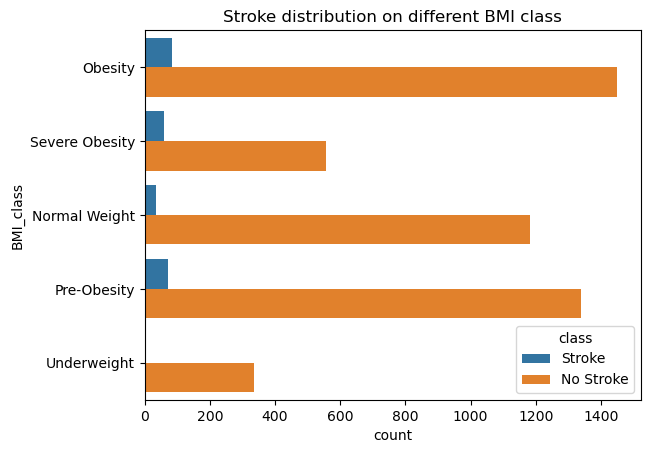

In [27]:
# Target variable distribution on BMI
sns.countplot(data=dataset_copy, y='BMI_class', hue='class')  # Creating a count plot for 'BMI_class' with hue based on 'class'
plt.title("Stroke distribution on different BMI class")  # Setting the title of the plot
plt.show()  # Displaying the plot

### Observation:

* The underweight patient are the least class that has stroke, followed by the normal weight class.
* Stroke seems to occur in patients with obesity, severe obesity and pre-obesity.

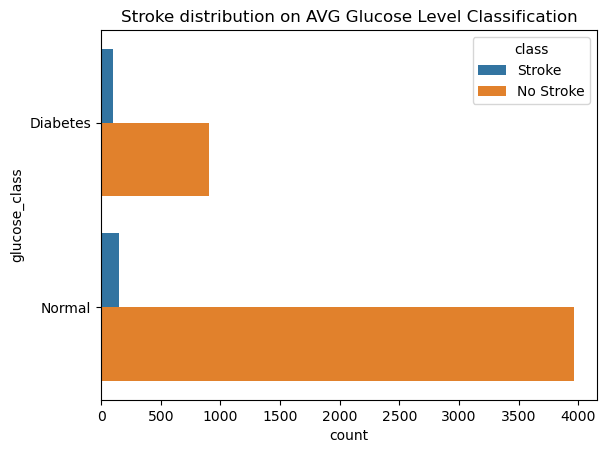

In [28]:
# Target variable distribution on AVG Glucose Level classification
sns.countplot(data=dataset_copy, y='glucose_class', hue='class')  # Creating a count plot for 'glucose_class' with hue based on 'class'
plt.title("Stroke distribution on AVG Glucose Level Classification")  # Setting the title of the plot
plt.show()  # Displaying the plot

Observation:
* We have more patients with normal glucose level, and very few of them have stroke.
* The patients with diabetes that has stroke are lesser than those with normal glucose level

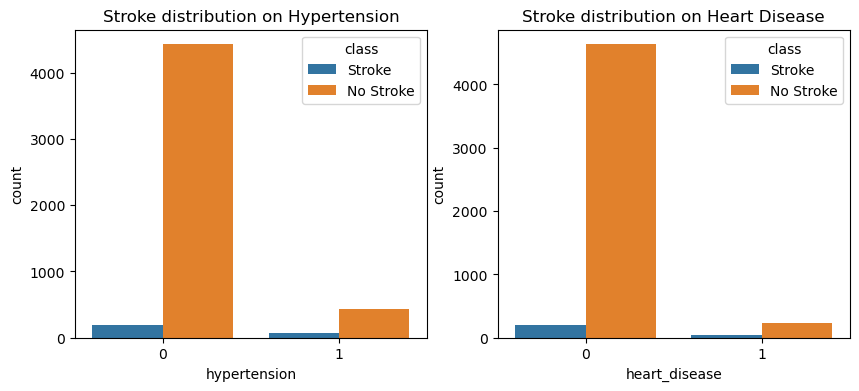

In [29]:
# Stroke on Hypertension and Heart disease
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))  # Creating subplots for hypertension and heart disease

# Count plot for Hypertension
sns.countplot(data=dataset_copy, x='hypertension', hue='class', ax=ax0)  # Creating a count plot for 'hypertension' with hue based on 'class'
ax0.set_title("Stroke distribution on Hypertension")  # Setting the title for the first subplot

# Count plot for Heart disease
sns.countplot(data=dataset_copy, x='heart_disease', hue='class', ax=ax1)  # Creating a count plot for 'heart_disease' with hue based on 'class'
ax1.set_title("Stroke distribution on Heart Disease")  # Setting the title for the second subplot

plt.show()  # Displaying the plots

Observation:

* Patients who does not have hypertension have stroke than those that does not have hypertension.
* patients who does not have heart disease have stroke than those that does not have heart disease.

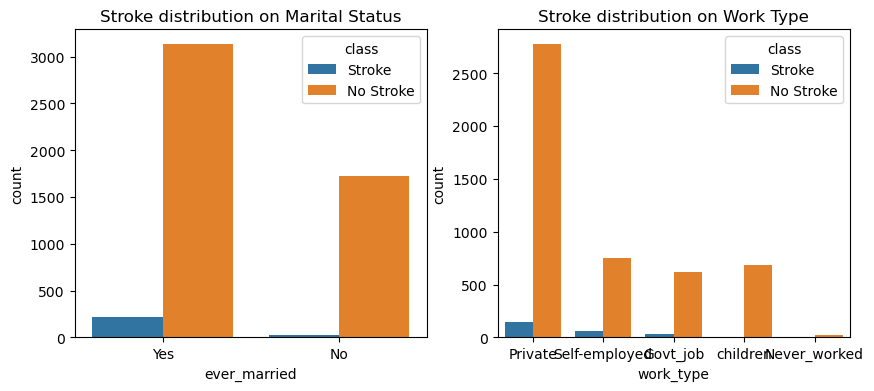

In [30]:
# Stroke on marital status and type of work
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))  # Creating subplots for marital status and type of work

# Count plot for Marital status
sns.countplot(data=dataset_copy, x='ever_married', hue='class', ax=ax0)  # Creating a count plot for 'ever_married' with hue based on 'class'
ax0.set_title("Stroke distribution on Marital Status")  # Setting the title for the first subplot

# Count plot for Work type
sns.countplot(data=dataset_copy, x='work_type', hue='class', ax=ax1)  # Creating a count plot for 'work_type' with hue based on 'class'
ax1.set_title("Stroke distribution on Work Type")  # Setting the title for the second subplot

plt.show()  # Displaying the plots

Observation:

* Patients who are married at a point in their life have stroke than those that have never married.
* More patients from the private sector has stroke, followed by the self employed, and govt workers respectively.
* More insights could have been determined if we are able to know the industry these patients work.


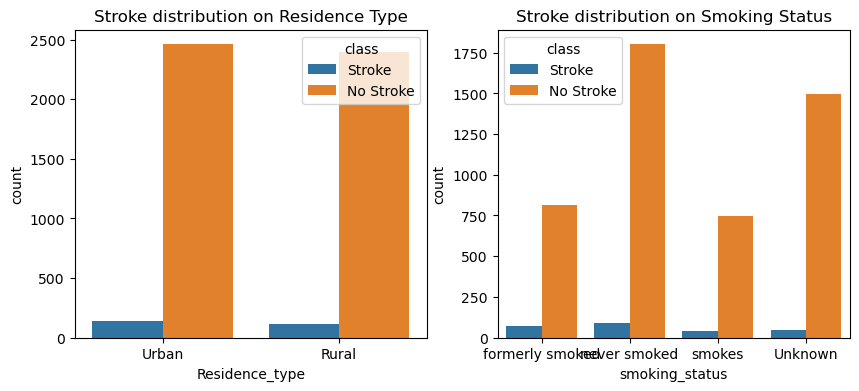

In [31]:
# Stroke on type of residence and smoking status
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))  # Creating subplots for type of residence and smoking status

# Count plot for Residence type
sns.countplot(data=dataset_copy, x='Residence_type', hue='class', ax=ax0)  # Creating a count plot for 'Residence_type' with hue based on 'class'
ax0.set_title("Stroke distribution on Residence Type")  # Setting the title for the first subplot

# Count plot for Smoking status
sns.countplot(data=dataset_copy, x='smoking_status', hue='class', ax=ax1)  # Creating a count plot for 'smoking_status' with hue based on 'class'
ax1.set_title("Stroke distribution on Smoking Status")  # Setting the title for the second subplot

plt.show()  # Displaying the plots

Observation:

* Patients with stroke is almost evenly spread across the rural types.
* Combination of patients that formely smoked and those that smokes have stroke than those that never smoked.
* We also have lots of unknown smoking status that has stroke

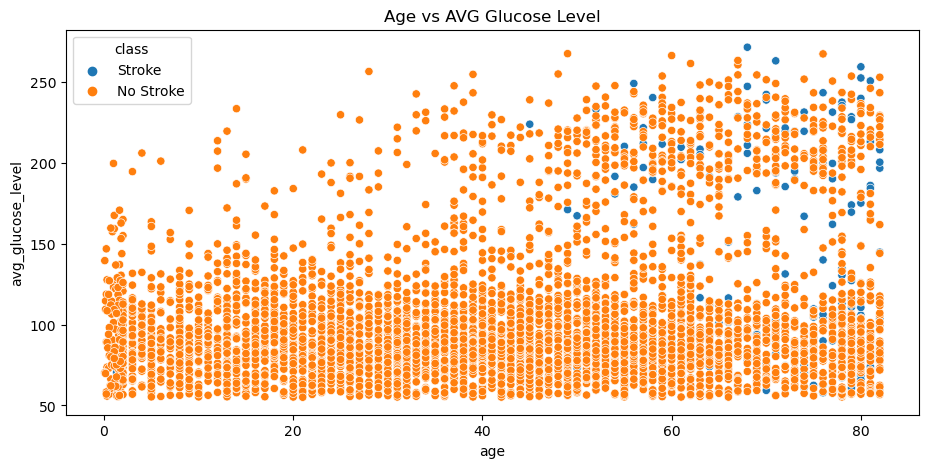

In [32]:
# Create a scatter plot of age vs average glucose level
fig, ax = plt.subplots(figsize=(11, 5))  # Create a new figure with specified size
sns.scatterplot(data=dataset_copy,       # Use the dataset_copy dataframe
                x="age",                 # Use the 'age' column for x-axis
                y="avg_glucose_level",   # Use the 'avg_glucose_level' column for y-axis
                hue='class')             # Color the points based on the 'class' column
plt.title('Age vs AVG Glucose Level')   # Set the title of the plot
plt.show()                              # Display the plot

Patients with average glucose level higher than 150 and over 60 years old tends to have stroke

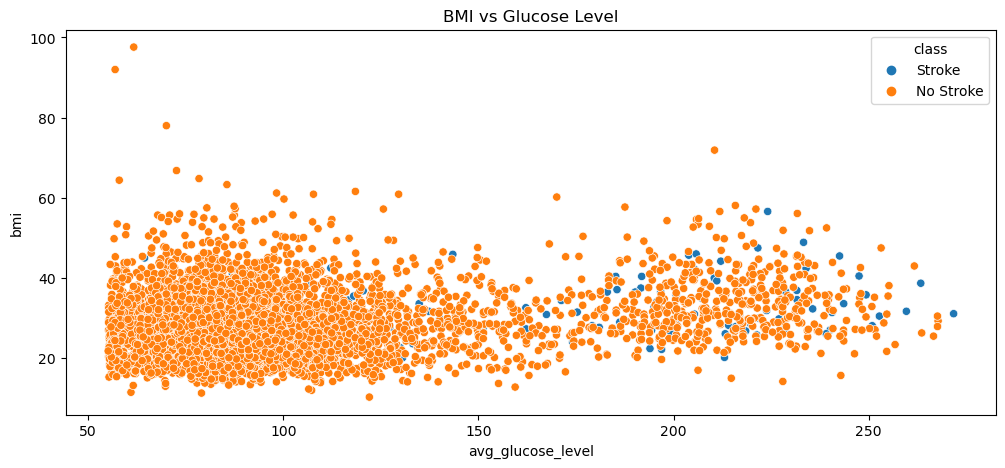

In [33]:
# BMI vs Glucose Level
fig, ax = plt.subplots(figsize=(12, 5))  # Creating a figure with a single subplot

# Scatter plot for BMI vs Glucose Level with hue based on 'class'
sns.scatterplot(data=dataset_copy, y="bmi", x="avg_glucose_level", hue='class')  
plt.title("BMI vs Glucose Level")  # Setting the title of the plot
plt.show()  # Displaying the plot

Most people have BMI less than 40, stroke tends to happen with the ones that have average glucose level over 150.

In [34]:
# Dropping the ID column if 'dataset' is defined and contains an 'id' column
dataset.drop(['id'], axis=1, inplace=True)
dataset.info()  # Displaying information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [35]:
# Statistics of the BMI column
dataset.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

Since we have right skewed distribution in the column, we are going to use the median to fill, the missing values.

In [36]:
# filling the missing values with median BMI
#dataset.fillna(value=stroke.bmi.median(), axis=1, inplace=True)
dataset['bmi'].fillna(dataset['bmi'].median(), inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [37]:
# Changing the 'Other' value in the gender column to 'Female'
print("Before Change: ", dataset.at[3116, 'gender'])  # Printing the value before change

dataset.at[3116, 'gender'] = 'Female'  # Changing the value at the specified index

print("After Change: ", dataset.at[3116, 'gender'])  # Printing the value after change

Before Change:  Other
After Change:  Female


#### 3.2 Changing the values of people under 18 with 'Unknown' smoking status to 'never smoked'

In [38]:
# Printing initial count of 'Unknown' smoking status
print("Initial Count of Unknown Smoking Status:", dataset[dataset['smoking_status'] == 'Unknown'].shape[0])

# Changing the values to 'never smoked' for individuals under 18 years old
dataset.loc[dataset['age'] < 18, 'smoking_status'] = 'never smoked'

# Printing current count of 'Unknown' smoking status after the change
print("Current Count of Unknown Smoking Status:", dataset[dataset['smoking_status'] == 'Unknown'].shape[0])

Initial Count of Unknown Smoking Status: 1544
Current Count of Unknown Smoking Status: 862


# Changing the "children" under work_type to "Never_worked"

In [39]:
# Changing the values to 'Never_worked' from 'children'
dataset.loc[dataset['work_type'] == 'children', 'work_type'] = 'Never_worked'

# View the counts of values in the 'work_type' column
dataset.work_type.value_counts()

work_type
Private          2925
Self-employed     819
Never_worked      709
Govt_job          657
Name: count, dtype: int64

In [40]:
# Using the function created earlier to categorize age, BMI, and glucose level
dataset[['age_group', 'BMI_class', 'glucose_class']] = dataset.apply(group_data, axis=1)

# Displaying the updated dataset
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,BMI_class,glucose_class
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Older_Adult,Obesity,Diabetes
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Adults,Pre-Obesity,Diabetes
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Older_Adult,Obesity,Normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adults,Obesity,Diabetes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Older_Adult,Normal Weight,Diabetes


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  age_group          5110 non-null   object 
 12  BMI_class          5110 non-null   object 
 13  glucose_class      5110 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 559.0+ KB


##### Encoding Categorical Data
* Label Encoding will be used for the ordinal features so we can preserve the order of the categories
* OneHot Encoding will be used for other nominal features since there are no inherent order in the categories.
* The Scikit-Learn library will be used to perform these operations.

In [42]:
# Importing label encoder and OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initializing LabelEncoder and OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

# Label Encoding
dataset['age_group'] = le.fit_transform(dataset['age_group'])
dataset['BMI_class'] = le.fit_transform(dataset['BMI_class'])
dataset['glucose_class'] = le.fit_transform(dataset['glucose_class'])

# OneHot Encoding
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    # Transforming and concatenating encoded columns
    temp = pd.DataFrame(ohe.fit_transform(dataset[[column]]).toarray(), 
                        columns=[f"{column}_{i}" for i in dataset[column].unique()])
    dataset = pd.concat([dataset, temp], axis=1)  # Concatenating the encoded columns to the dataset
    dataset = dataset.drop(column, axis=1)  # Dropping the original column after encoding

# Displaying the modified dataset
dataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_group,BMI_class,glucose_class,gender_Male,...,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_Never_worked,Residence_type_Urban,Residence_type_Rural,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_Unknown
0,67.0,0,1,228.69,36.6,1,2,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.1,1,0,2,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,2,1,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,0,1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,2,0,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   age_group                       5110 non-null   int32  
 7   BMI_class                       5110 non-null   int32  
 8   glucose_class                   5110 non-null   int32  
 9   gender_Male                     5110 non-null   float64
 10  gender_Female                   5110 non-null   float64
 11  ever_married_Yes                5110 non-null   float64
 12  ever_married_No                 51

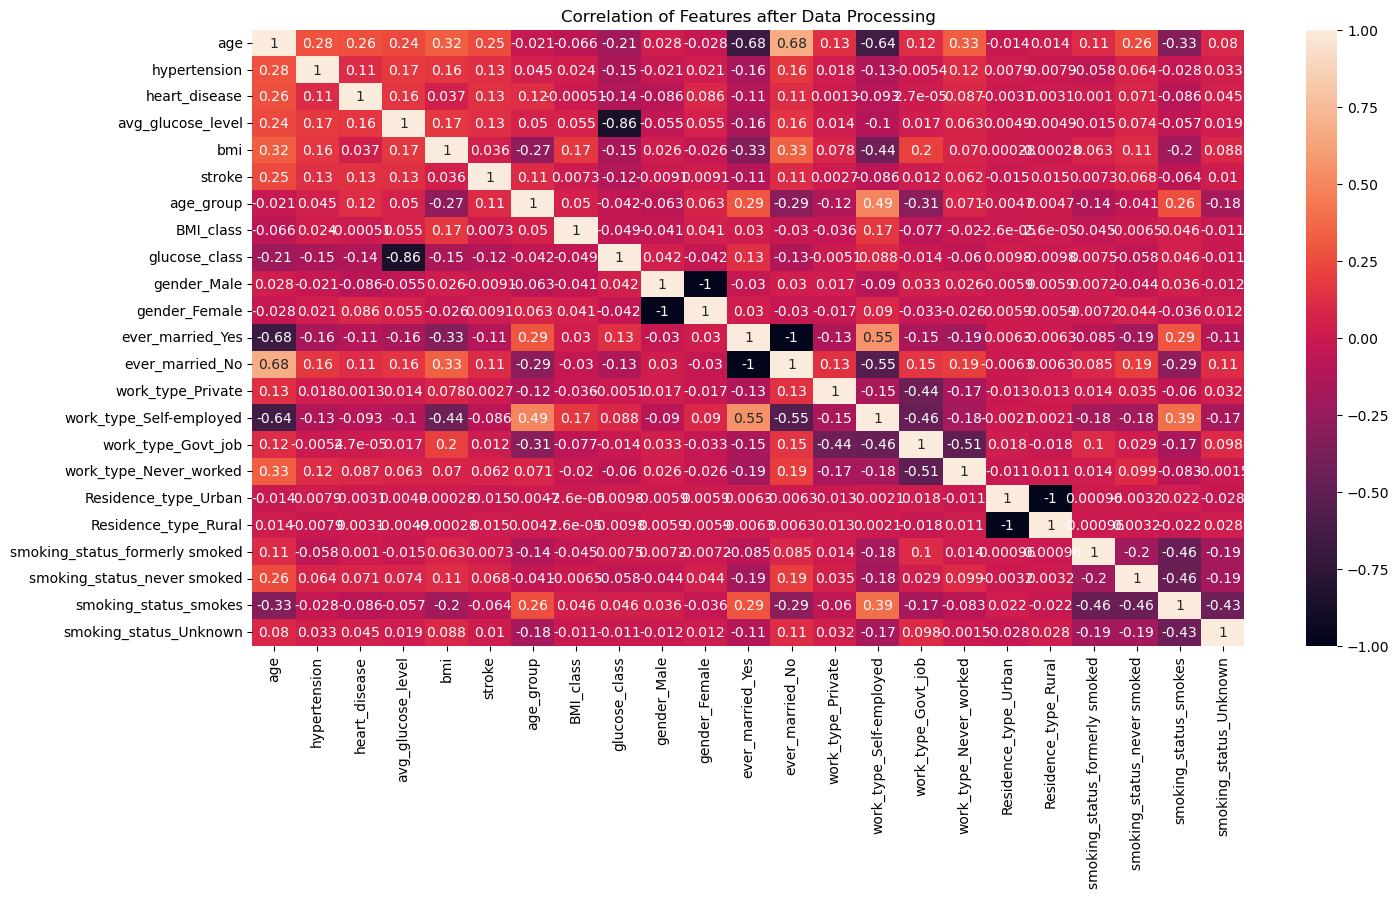

In [44]:
# Standard correlation coefficients of features after Processing
plt.figure(figsize=(16, 8))  # Setting the figure size
sns.heatmap(dataset.corr(), annot=True)  # Creating a heatmap of the correlation matrix with annotations
plt.title("Correlation of Features after Data Processing")  # Setting the title of the plot
plt.show()  # Displaying the plot

## BUILDING AND TRAINING THE MODEL

In [45]:
from sklearn.model_selection import train_test_split

# Input features (dropping 'stroke' column)
X = dataset.drop(['stroke'], axis=1)

# Output Label ('stroke' column)
y = dataset['stroke']


In [46]:
X.shape

(5110, 22)

In [47]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for feature selection
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression for stacking classifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report, roc_auc_score  # Importing evaluation metrics
from imblearn.over_sampling import SMOTE  # Importing SMOTE for oversampling
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Importing StandardScaler for feature scaling
from sklearn.feature_selection import SelectFromModel  # Importing SelectFromModel for feature selection

In [48]:
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data
from sklearn.ensemble import StackingClassifier  # Importing  StackingClassifier for ensemble methods
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier for decision tree classifier
from sklearn.neighbors import KNeighborsClassifier  # Importing KNeighborsClassifier for K-nearest neighbors classifier
from sklearn.svm import SVC  # Importing SVC for support vector classifier
from sklearn.naive_bayes import GaussianNB  # Importing GaussianNB for Gaussian Naive Bayes classifier
from sklearn.feature_selection import SelectKBest, chi2  # Importing SelectKBest and chi2 for feature

#### FEATURE SELECTION

In [49]:
#Feature selection
# Apply SelectKBest to select top features

selector = SelectKBest(chi2, k=10)  # Initializing SelectKBest with chi2 scoring and selecting top 10 features
X_new = selector.fit_transform(X, y)  # Transforming X to select the top features
selected_features = X.columns[selector.get_support(indices=True)]  # Getting the selected feature names
print("Selected Features:", selected_features)  # Printing the selected feature names



# SelectKBest is used with the chi2 scoring function to select the top 10 features (k=10) based on their importance scores.
# selector.fit_transform(X, y) fits the selector on the input features X and transforms X to include only the selected features (X_new).
# selector.get_support(indices=True) retrieves the indices of the selected features.
# X.columns[selector.get_support(indices=True)] retrieves the names of the selected features from the original DataFrame X.
# Finally, print("Selected Features:", selected_features) prints the names of the selected features.

Selected Features: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'age_group', 'ever_married_Yes', 'ever_married_No',
       'work_type_Self-employed', 'work_type_Never_worked',
       'smoking_status_never smoked'],
      dtype='object')


In [50]:
# Handle imbalanced dataset using SMOTE
sm = SMOTE(random_state=42)  # Initializing SMOTE with a random state for reproducibility
X_res, y_res = sm.fit_resample(X_new, y)  # Resampling the dataset to balance the classes

In [51]:
X_res.shape

(9722, 10)

In [52]:
y_res.shape

(9722,)

### SPLITTING THE DATASET

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.2 , random_state = 42)

In [55]:
X_train.shape

(7777, 10)

In [56]:
X_test.shape

(1945, 10)

In [57]:
y_train.shape

(7777,)

In [58]:
y_train.value_counts()

stroke
1    3891
0    3886
Name: count, dtype: int64

In [59]:
y_test.value_counts()

stroke
0    975
1    970
Name: count, dtype: int64

#### STANDARDIZATION OF THE MODEL

In [62]:
# Standardize features using StandardScaler
scaler = StandardScaler()  # Initializing StandardScaler
X_train = scaler.fit_transform(X_train)  # Fitting and transforming on training data
X_test = scaler.transform(X_test)  # Transforming test data using the fitted scaler

#### DEFINING THE BASE CLASSIFIERS

In [64]:
#define base classifiers
base_classifiers = [
    ('logreg',LogisticRegression()),
    ('dt',DecisionTreeClassifier()),
    ('rf',RandomForestClassifier()),
    ('knn',KNeighborsClassifier()),
    ('svc',SVC(probability = True)),
    ('nb',GaussianNB())
]

#### EVALUATING THE BASE CLASSIFIERS

In [65]:
# Evaluate base classifiers

for name, clf in base_classifiers:
    clf.fit(X_train, y_train)  # Fitting the classifier on the training data
    y_pred = clf.predict(X_test)  # Predicting on the test data
    print(f"{name} Classification Report:")  # Printing classifier name for identification
    print(classification_report(y_test, y_pred))  # Printing classification report
    print("Confusion Matrix:")  # Printing confusion matrix
    print(confusion_matrix(y_test, y_pred))  # Printing confusion matrix
    if hasattr(clf, 'predict_proba'):  # Checking if the classifier has predict_proba method (for ROC AUC score)
        print(f"AUC-ROC: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")  # Printing ROC AUC score
    else:
        print("AUC-ROC: N/A")  # Printing 'N/A' if predict_proba method is not available
    print('-'*50)  # Printing separator for clarity





# for name, clf in base_classifiers: iterates through each tuple in base_classifiers.
# clf.fit(X_train, y_train) fits each classifier (clf) on the training data (X_train, y_train).
# y_pred = clf.predict(X_test) predicts the labels on the test data (X_test).
# classification_report(y_test, y_pred) generates and prints the classification report showing precision, recall, F1-score, and support for each class.
# confusion_matrix(y_test, y_pred) computes and prints the confusion matrix.
# roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) calculates and prints the ROC AUC score if the classifier supports probability estimates (predict_proba). Otherwise, it prints 'N/A'.
# '-'*50 prints a separator to distinguish the results of different classifiers.

logreg Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       975
           1       0.75      0.84      0.79       970

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945

Confusion Matrix:
[[697 278]
 [156 814]]
AUC-ROC: 0.8492942109436954
--------------------------------------------------
dt Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       975
           1       0.95      0.94      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

Confusion Matrix:
[[922  53]
 [ 54 916]]
AUC-ROC: 0.944985461274121
--------------------------------------------------
rf Classification Report:
              precision  

## Observation
---
* Logistic Regression (logreg)
Precision, Recall, F1-score:
1. Class 0 (No Stroke): Precision of 0.82, Recall of 0.71, F1-score of 0.76.
2. Class 1 (Stroke): Precision of 0.75, Recall of 0.84, F1-score of 0.79.
3. Accuracy: Overall accuracy of 0.78.
4. AUC-ROC: AUC-ROC score of 0.85.
---
* Decision Tree Classifier (dt)
Precision, Recall, F1-score:
1. Class 0 (No Stroke): Precision of 0.94, Recall of 0.94, F1-score of 0.94.
2. Class 1 (Stroke): Precision of 0.94, Recall of 0.94, F1-score of 0.94.
3. Accuracy: Overall accuracy of 0.94.
4. AUC-ROC: AUC-ROC score of 0.94.
---

* Random Forest Classifier (rf)
Precision, Recall, F1-score:
1. Class 0 (No Stroke): Precision of 0.95, Recall of 0.98, F1-score of 0.96.
2. Class 1 (Stroke): Precision of 0.98, Recall of 0.94, F1-score of 0.96.
3. Accuracy: Overall accuracy of 0.96.
4. AUC-ROC: AUC-ROC score of 0.99.
---

* K-Nearest Neighbors Classifier (knn)
Precision, Recall, F1-score:
1. Class 0 (No Stroke): Precision of 0.94, Recall of 0.91, F1-score of 0.92.
2. Class 1 (Stroke): Precision of 0.91, Recall of 0.94, F1-score of 0.92.
3. Accuracy: Overall accuracy of 0.92.
4. AUC-ROC: AUC-ROC score of 0.98.


* Decision Tree and Random Forest: Both decision tree-based models (Decision Tree and Random Forest) perform exceptionally well with high precision, recall, and F1-scores for both classes. They also achieve very high accuracy and AUC-ROC scores, indicating robust performance across the metrics.

* Logistic Regression and KNN: Logistic Regression and K-Nearest Neighbors (KNN) also perform well but generally slightly lower compared to decision tree-based models in terms of precision, recall, and F1-score. Logistic Regression shows balanced performance for both classes, while KNN shows a slight bias towards class 0 (No Stroke).

* Random Forest: The Random Forest model stands out with the highest accuracy and AUC-ROC score among the evaluated classifiers, indicating it effectively balances between precision and recall for both classes.

In [66]:
# Define meta-classifier using Logistic Regression
meta_classifier = LogisticRegression()


# LogisticRegression() creates an instance of the logistic regression classifier.
# meta_classifier is assigned to this instance, which will be used as the meta-classifier in stacking or any ensemble method.
# Meta-classifiers are typically used in ensemble methods like stacking to combine predictions from multiple base classifiers.
# If you plan to proceed with stacking classifiers or any other ensemble method, you can further integrate this meta-classifier into your pipeline.

In [67]:
# Define the stacking model
stacking_model = StackingClassifier(
    estimators=base_classifiers,  # List of base classifiers to be stacked
    final_estimator=meta_classifier,  # Meta-classifier to combine predictions from base classifiers
    cv=5  # Number of cross-validation folds for training base classifiers
)


In [68]:
# Train stacking model
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('logreg', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC(probability=True)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [69]:
# Make predictions with stacking model
y_pred_stack = stacking_model.predict(X_test)  # Predicted class labels
y_pred_proba_stack = stacking_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1



# predict: This method predicts the class labels (y_pred_stack) for the input data X_test using the stacking model (stacking_model).
# predict_proba: This method predicts the probabilities (y_pred_proba_stack) 
# of the target variable being class 1 (in binary classification) for the input data X_test using the stacking model.

In [70]:
# Evaluate stacking model
print("Stacking Model Classification Report:")
print(classification_report(y_test, y_pred_stack))  # Print classification report with precision, recall, f1-score, and support
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))  # Print confusion matrix showing true positives, false positives, etc.
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_stack)}")  # Print Area Under the ROC Curve (AUC-ROC) score

Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       975
           1       0.97      0.95      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

Confusion Matrix:
[[950  25]
 [ 51 919]]
AUC-ROC: 0.9926756542426645


### Classification Report:
1. Precision: Precision measures the accuracy of positive predictions.
2. For class 0 (no stroke), the precision is 0.95, indicating that 95% of the instances predicted as not having a stroke actually do not have a stroke. 
3. For class 1 (stroke), the precision is 0.97, indicating that 97% of the instances predicted as having a stroke actually have a stroke.
4. Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of actual positive instances that are correctly predicted. 
5. For class 0, the recall is 0.97, meaning 97% of the actual instances of no stroke were correctly predicted.
6. For class 1, the recall is 0.95, indicating that 95% of the actual instances of stroke were correctly predicted.
7. F1-score: The F1-score is the harmonic mean of precision and recall, providing a single metric to evaluate a model's accuracy. Both classes have an F1-score of 0.96, indicating a balanced performance between precision and recall.
8. Support: The number of actual occurrences of each class in the test set (975 instances of class 0 and 970 instances of class 1).




### Confusion Matrix
1. The confusion matrix provides a tabular summary of the predictions versus the actual labels:
2. True Negatives (TN): 950 instances were correctly predicted as no stroke.
3. False Positives (FP): 25 instances were incorrectly predicted as stroke.
4. False Negatives (FN): 51 instances were incorrectly predicted as no stroke.
5. True Positives (TP): 919 instances were correctly predicted as stroke.


### AUC-ROC:
* The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) score is a measure of how well the model distinguishes between classes. A score of 0.99 indicates very high predictive performance, suggesting that the stacking model is effective at differentiating between individuals who are likely to have a stroke and those who are not.

* The stacking model demonstrates excellent performance with an accuracy of 96%, balanced precision and recall scores, and a high AUC-ROC score, indicating robust predictive capabilities in identifying stroke risk based on the given dataset.